In [1]:
%reset

Nothing done.


In [3]:
import pickle
from scipy.io import loadmat
hiwa = pickle.load(open("Results/08302023/hiwa_transfer_moth_1", "rb"))
FD = loadmat("Results/08302023/NoHiWA_SCENARIO_I_F_OneMissingSubj_sigma0.0025_PCAThreshold10_noHidUnit15_lr0.005_tol0.1_TrainTestRatio0.5")
CD = loadmat("Results/08302023/NoHiWA_SCENARIO_I_CD_OneMissingSubj_sigma0.0025_PCAThreshold10_noHidUnit15_lr0.005_tol0.1_TrainTestRatio0.5")

In [5]:
all_result = []
all_label = []
moth_label = []
Z = [1,2,3,4,6,7,8,9,10]
C = [1,2,3,4,5,6,7,8,9]
seed_cutoff = 100
import pandas as pd
for index,i in enumerate(Z):
    hiwa = pickle.load(open("Results/08302023/hiwa_transfer_moth_{}".format(i), "rb"))
    LDA = list(FD["Rate_LDA"]["moth_{}".format(i)][0][0][-1,0:seed_cutoff])
    Fisher = list(FD["Rate_FRBM"]["moth_{}".format(i)][0][0][-1,0:seed_cutoff])
    MLCD = list(CD["Rate_MLRBM"]["moth_{}".format(i)][0][0][-1,0:seed_cutoff])
    No_T = list(CD["Rate_NO"]["moth_{}".format(i)][0][0][0,0:seed_cutoff])
    hiwa_result = []
    print(len(hiwa))
    for j, seed_result in enumerate(hiwa):
        hiwa_result.append(np.mean(seed_result[0]))
    all_result += LDA + Fisher + MLCD + hiwa_result + No_T 
    all_label += ["Subject Specific"]*seed_cutoff + ["RBM-FD (Ours)"]*seed_cutoff +\
        ["RBM-CD"]*seed_cutoff + ["HiWA"]*seed_cutoff + ["No Transfer"]*seed_cutoff
    moth = ["Moth {}".format(C[index])]
    moth_label += moth*(seed_cutoff*5) 
df = pd.DataFrame({"Decoding Accuracy":all_result, "Method": all_label, "": moth_label})
    

100
100
100
100
100
100
100
100
100


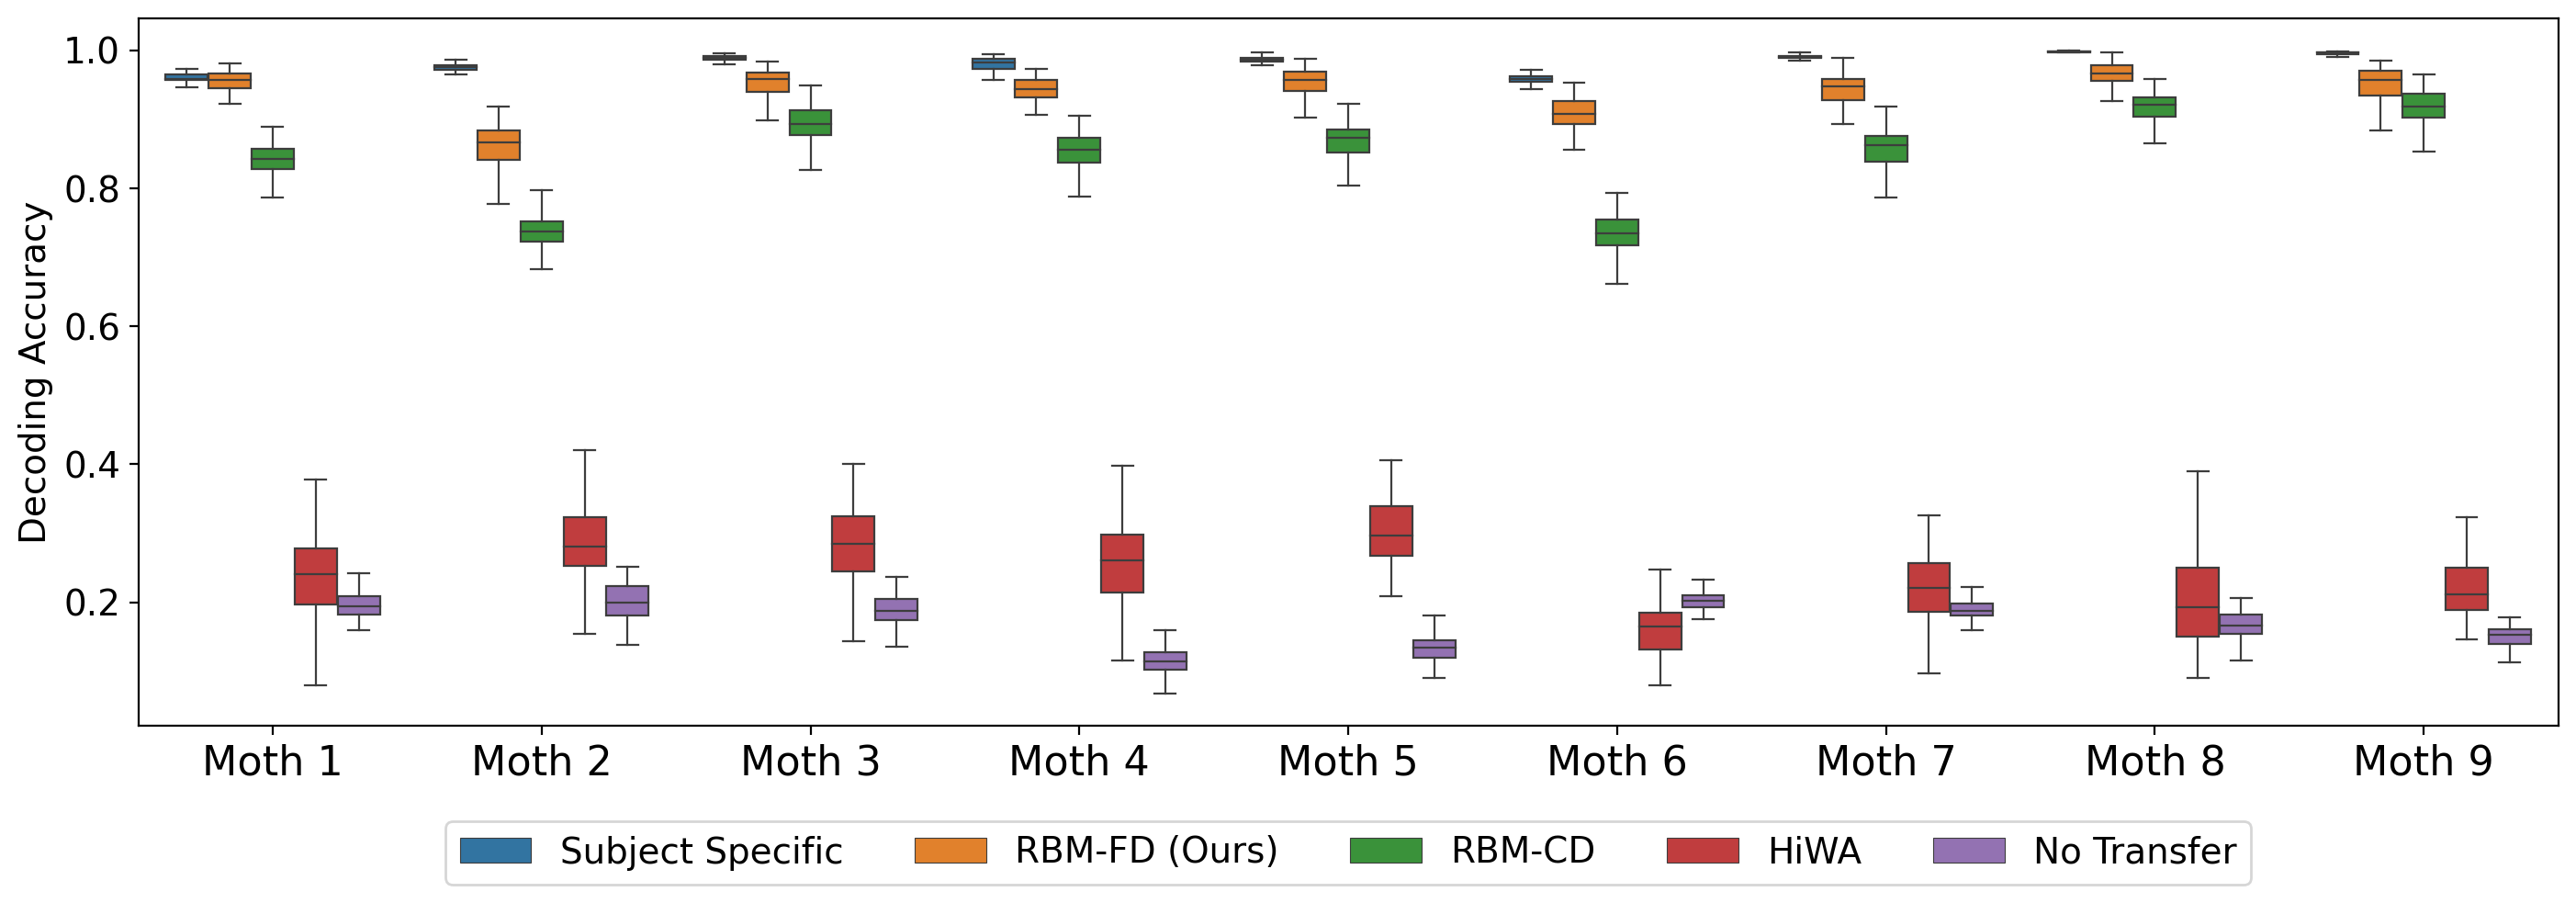

In [10]:
import seaborn as sns

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(17,5), dpi=200)
ax = sns.boxplot(data=df, x="", y="Decoding Accuracy", hue="Method", linewidth=0.8,width=0.8,
              showfliers = False)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25),ncol=5)
plt.savefig("Scenario1.pdf", bbox_inches="tight")